In [153]:
# read data

import numpy as np 
import matplotlib.pyplot as plt 

path = '../ex2data2.txt'
X = []
Y = []

with open(path) as f:
    for line in f.read().splitlines():
        line = line.split(',')
        X.append([float(line[0]), float(line[1])])
        Y.append([int(line[2])])

X = np.array(X)
Y = np.array(Y)
print(X.shape)

(118, 2)


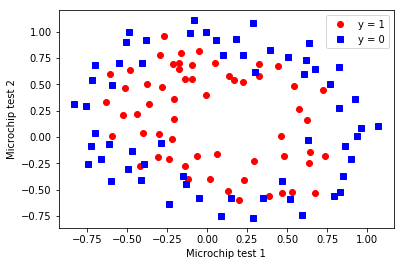

In [150]:
# visualize data

pos = np.where(Y == 1)[0]
neg = np.where(Y == 0)[0]

plt.figure()
plt.subplot()
plt.plot(X[pos][:, 0], X[pos][:, 1], 'ro', label='y = 1')
plt.plot(X[neg][:, 0], X[neg][:, 1], 'bs', label='y = 0')
plt.legend()
plt.xlabel('Microchip test 1')
plt.ylabel('Microchip test 2')
# plt.axis([-1, 1, -1, 1])
plt.show()


In [154]:
# feature mapping

x1 = X[:,0]
x2 = X[:,1]
def mapFeature(x1, x2):
    k = x1.shape[0]
    deg = 6
    X_train = np.ones((k, 1))
    for i in range(1, deg+1):
        for j in range(i+1):
            X_train = np.hstack((X_train, ((x1**(i-j))*(x2**j)).reshape(k,1)))

    return X_train
X_train = mapFeature(x1, x2)
m = X_train.shape[0]
n = X_train.shape[1]
# print(X.shape)
# print(X_train.shape)

(118, 2)
(118, 28)


In [192]:
# funciton algorithm

def predict(w, x):
    z = x.dot(w)
    return 1 / (1 + np.exp(-z))

def GD(w_init, lr, ite, alpha, x, y):
    w = w_init
    for it in range(ite):
        w[0] = w[0] - lr*x[:,0].dot(predict(w, x)- y)
        for i in range(1, n):
            w[i] = w[i] - lr*(x[:, i].dot(predict(w, x) - Y)/m + alpha*w[i]/m)
#         if it%1000 == 0:
#             print(np.abs(predict(w, x) - Y).mean())
    return w

In [201]:
# init parameter

lr = .1
alpha = .1
ite = 10000
w_init = np.zeros((n,1))

In [175]:
# optimize

w_op = GD(w_init, lr, ite, alpha, X_train, Y)
print('Loss: %.4f'%np.abs(predict(w_op, X_train) - Y).mean())


0.25090278573035624
0.2508862834606653
0.2508717873062449
0.25085903068547916
0.2508477871183319
0.2508378632004089
0.25082909301272743
0.2508213336344996
0.25081446151037623
0.25080836948522056
Loss: 0.2508


In [176]:
print(w_op.shape)
print(X_train.shape)
print(Y.shape)

(28, 1)
(118, 28)
(118, 1)


In [188]:
# axis
xmin, xmax = X[neg][:, 0].min() - .3, X[neg][:, 0].max() + .3
ymin, ymax= X[neg][:, 1].min() - .3, X[neg][:, 1].max() + .3
# print(xmin, xmax)
# print(ymin, ymax)

# grid
xx, yy = np.meshgrid(np.arange(xmin, xmax, .02), np.arange(ymin, ymax, .02))

# feature
grid = np.c_[xx.ravel(), yy.ravel()] #concatenate
# print(grid.shape)
gridFeaMap = mapFeature(grid[:,0], grid[:,1]) #feature Mapping
# print(gridFeaMap.shape)
z = predict(w_op, gridFeaMap) #predict
# print(z.shape)
# print(z[0])

# classification
prepos = np.where(z >= .5)[0]
preneg = np.where(z < .5)[0]
z[preneg] = 0 #label
z[prepos] = 1
# print(prepos.shape)
# print(preneg.shape)
# print(z.shape)
z = z.reshape(xx.shape)

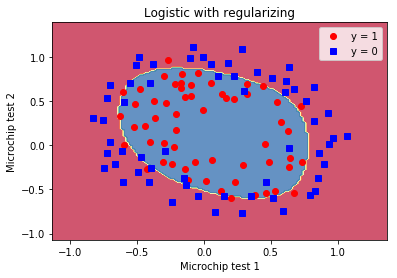

In [190]:
# plot origin data
pos = np.where(Y == 1)[0]
neg = np.where(Y == 0)[0]
plt.plot(X[pos][:, 0], X[pos][:, 1], 'ro', label='y = 1')
plt.plot(X[neg][:, 0], X[neg][:, 1], 'bs', label='y = 0')
plt.legend()
plt.xlabel('Microchip test 1')
plt.ylabel('Microchip test 2')
plt.title('Logistic with regularizing')

# plot decsboundary
plt.contourf(xx, yy, z, alpha=.8, cmap=plt.cm.Spectral)
# plt.savefig(fname='alpha=%.2f.png'%alpha)
plt.show()


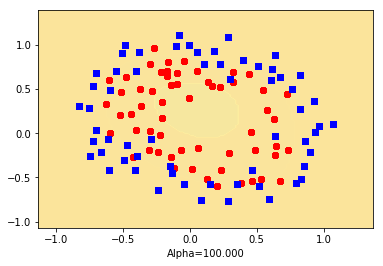

In [205]:
alphas = [0, .001, .01, .1, 1, 10, 100]
for alpha in alphas:
    w_op = GD(w_init, lr, ite, alpha, X_train, Y)
    z = predict(w_op, gridFeaMap)
    prepos = np.where(z >= .5)[0]
    preneg = np.where(z < .5)[0]
    z[preneg] = 0
    z[prepos] = 1
    z = z.reshape(xx.shape)
    
    pos = np.where(Y == 1)[0]
    neg = np.where(Y == 0)[0]
    plt.plot(X[pos][:, 0], X[pos][:, 1], 'ro')
    plt.plot(X[neg][:, 0], X[neg][:, 1], 'bs')
#     plt.legend()
    plt.xlabel('Alpha=%.3f'%alpha)
#     plt.ylabel('Microchip test 2')
#     plt.title('Alpha=%.3f'%alpha)

    # plot decsboundary
    plt.contourf(xx, yy, z, alpha=.8, cmap=plt.cm.Spectral)
    plt.savefig(fname='alpha=%.3f.png'%alpha)
#     plt.show()
# plt.savefig('Alpha.png')

<Figure size 432x288 with 0 Axes>

In [180]:
# print(xx.shape)
# print(yy.shape)

(124, 126)
(124, 126)


In [181]:
# test = np.c_[xx.ravel(), yy.ravel()]
# print(test.shape)
# test1 = mapFeature(test[:,0], test[:,1])
# print(test1.shape)
# test2 = test1.dot(w_op)
# test3 = predict(w_op, test1)
# print(test2.shape)
# print(test2[0])
# print(test3.shape)
# print(test3[0])
# prepos = np.where(test3 >= .5)[0]

# preneg = np.where(test3 < .5)[0]
# test3[preneg] = 0
# test3[prepos] = 1
# print(prepos.shape)
# print(preneg.shape)
# print(test3.shape)
# test3 = test3.reshape(xx.shape)
# # print(preneg.shape)


(15624, 2)
(15624, 28)
(15624, 1)
[-33.26284247]
(15624, 1)
[3.5820452e-15]
(4019,)
(11605,)
(15624, 1)
